# ENTREGABLE M33

In [3]:
#Importamos librerias que se usaran
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lectura de archivo csv
df = pd.read_csv('vgsales.csv')

### Lectura, head, tail, sample, describe. Y validacion de columnas numericas

In [38]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [40]:
df.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8731,8733,Bomberman,PSP,2006.0,Puzzle,Konami Digital Entertainment,0.14,0.00,0.0,0.01,0.15
4932,4934,Extreme-G: XG2,N64,1998.0,Racing,Acclaim Entertainment,0.31,0.07,0.0,0.00,0.39
9404,9406,Greg Hastings Paintball 2,Wii,2010.0,Shooter,505 Games,0.12,0.00,0.0,0.01,0.13


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [9]:
#Ver tipo de datos de cada columna
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


### Elementos: Totales y Ventas

In [10]:
#TOTALES

In [12]:
#Total de videojuegos
total_juegos = df['Name'].nunique()
total_juegos

# -> .nunique() cuenta los nombres unicos de videojuegos

11493

In [15]:
#Total de Generos lanzados
total_generos = df['Genre'].nunique()
total_generos

#Dice cuantos tipos de generos hay

12

In [16]:
#Total de plataformas lanzadas
total_plataformas = df['Platform'].nunique()
total_plataformas

#Dice cuantas consolas o sistemas hay

31

In [17]:
#VENTAS

In [19]:
#Se agrupa por año y sumamos ventas de cada region
ventas_anuales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas_anuales.head())


        NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                           
1980.0     10.59      0.67      0.00         0.12         11.38
1981.0     33.40      1.96      0.00         0.32         35.77
1982.0     26.92      1.65      0.00         0.31         28.86
1983.0      7.76      0.80      8.10         0.14         16.79
1984.0     33.28      2.10     14.27         0.70         50.36


In [21]:
# Para cada año, elegimos el juego con mayor venta global
top_juegos = df.loc[df.groupby('Year')['Global_Sales'].idxmax(), ['Year', 'Name', 'Global_Sales']]
print(top_juegos.head())

# idxmax busca el indice del valor mas alto por año

       Year       Name  Global_Sales
258  1980.0  Asteroids          4.31
239  1981.0   Pitfall!          4.50
89   1982.0    Pac-Man          7.81
421  1983.0   Baseball          3.20
9    1984.0  Duck Hunt         28.31


In [22]:
# Para cada año, elegimos la plataforma con más ventas globales
top_ingresos = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
plataformas_top = top_ingresos.loc[top_ingresos.groupby('Year')['Global_Sales'].idxmax()]
print(plataformas_top.head())


     Year Platform  Global_Sales
0  1980.0     2600         11.38
1  1981.0     2600         35.77
2  1982.0     2600         28.86
4  1983.0      NES         10.96
6  1984.0      NES         50.09


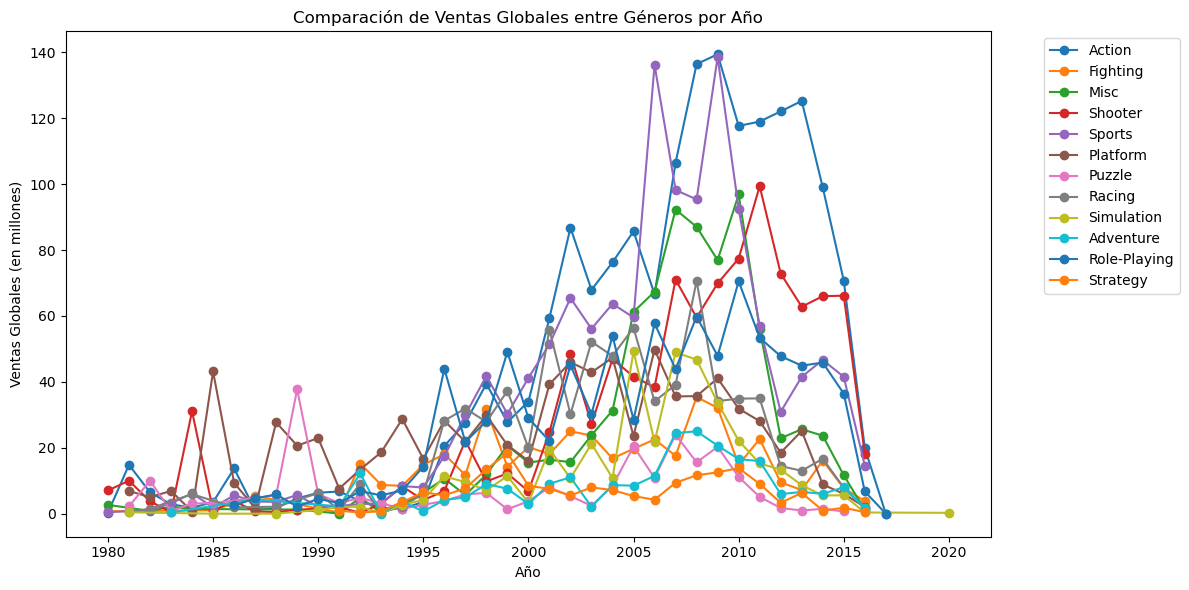

In [24]:
# Agrupamos por año y género
ventas = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Creamos el gráfico
plt.figure(figsize=(12,6))
for genero in ventas['Genre'].unique():
    datos = ventas[ventas['Genre'] == genero]
    plt.plot(datos['Year'], datos['Global_Sales'], marker='o', label=genero)

plt.title('Comparación de Ventas Globales entre Géneros por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Este grafico muestra generos que crecieron o bajaron en ventas a lo largo del tiempo


### GRAFICOS ADICIONALES

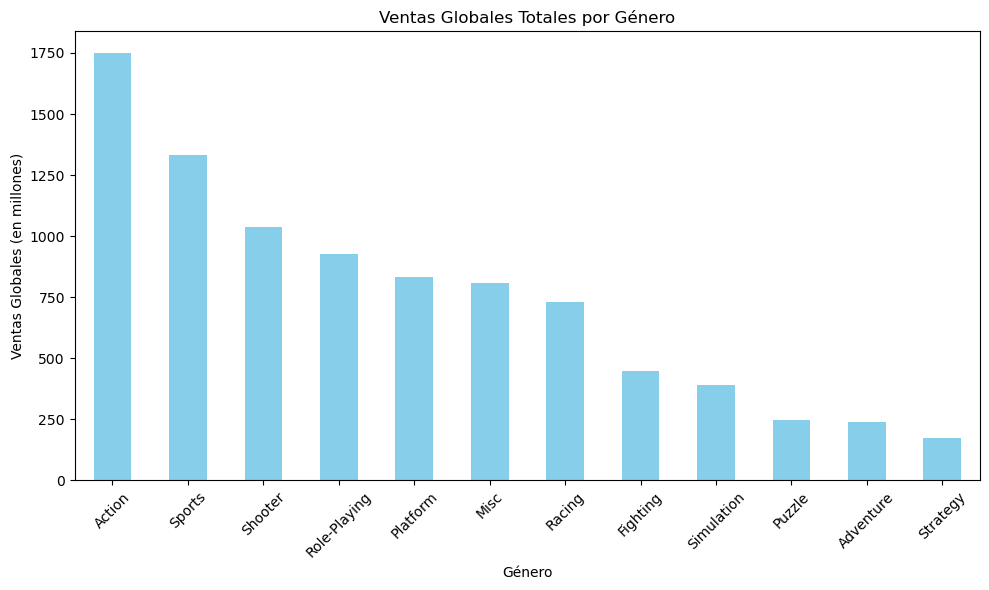

In [26]:
#GRAFICO 1 - Generos mas vendidos
# Agrupamos por género y sumamos las ventas globales
ventas_por_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
ventas_por_genero.plot(kind='bar', color='skyblue')

plt.title('Ventas Globales Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Se puede ver cuales son los generos mas populares en el mundo

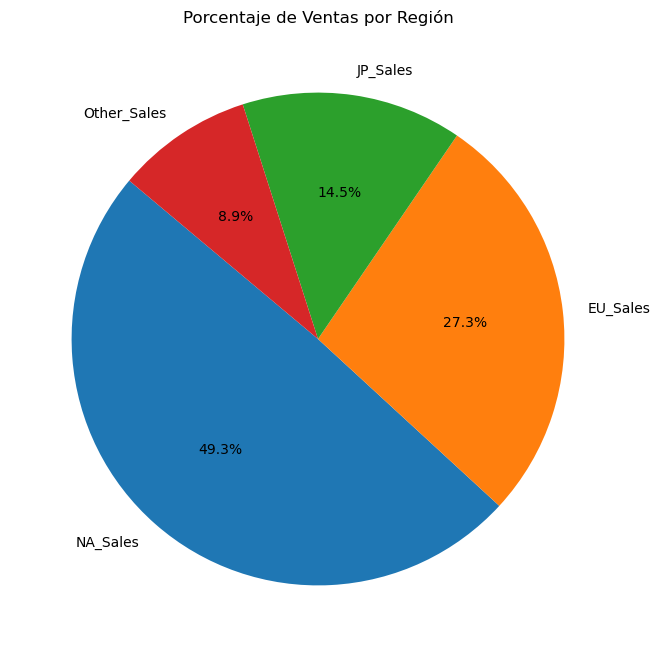

In [28]:
#GRAFICO 2 - Distribucion de ventas por region
# Sumar ventas totales por región
ventas_regiones = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Gráfico circular
plt.figure(figsize=(8,8))
plt.pie(ventas_regiones, labels=ventas_regiones.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Ventas por Región')
plt.show()

#Se puede ver que regiones representan mayor parte del mercado

### CRECIMIENTO

In [29]:
#FILTRAR LOS ULTIMOS 4 AÑOS
# Ver años disponibles
print("Años disponibles:", sorted(df['Year'].dropna().unique()))

# Tomamos los últimos 4 años disponibles
ultimos_4 = sorted(df['Year'].dropna().unique())[-4:]
print("Últimos 4 años considerados:", ultimos_4)

# Filtramos el dataframe
df_4y = df[df['Year'].isin(ultimos_4)]

#Esto solo deja los datos recientes, sobre los cuales vamos a ver el crecimiento

Años disponibles: [np.float64(1980.0), np.float64(1981.0), np.float64(1982.0), np.float64(1983.0), np.float64(1984.0), np.float64(1985.0), np.float64(1986.0), np.float64(1987.0), np.float64(1988.0), np.float64(1989.0), np.float64(1990.0), np.float64(1991.0), np.float64(1992.0), np.float64(1993.0), np.float64(1994.0), np.float64(1995.0), np.float64(1996.0), np.float64(1997.0), np.float64(1998.0), np.float64(1999.0), np.float64(2000.0), np.float64(2001.0), np.float64(2002.0), np.float64(2003.0), np.float64(2004.0), np.float64(2005.0), np.float64(2006.0), np.float64(2007.0), np.float64(2008.0), np.float64(2009.0), np.float64(2010.0), np.float64(2011.0), np.float64(2012.0), np.float64(2013.0), np.float64(2014.0), np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2020.0)]
Últimos 4 años considerados: [np.float64(2015.0), np.float64(2016.0), np.float64(2017.0), np.float64(2020.0)]


In [30]:
#Preparar datos
# Agrupar las ventas globales por género y año
ventas_genero = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Mostrar los primeros registros
print(ventas_genero.head())


     Year     Genre  Global_Sales
0  1980.0    Action          0.34
1  1980.0  Fighting          0.77
2  1980.0      Misc          2.71
3  1980.0   Shooter          7.07
4  1980.0    Sports          0.49


In [32]:
#CALCULAR CRECIMIENTO PORCENTUAL
# Ordenar por género y año antes de calcular
ventas_genero = ventas_genero.sort_values(['Genre', 'Year'])

# Calcular el porcentaje de cambio año con año
ventas_genero['Crecimiento'] = ventas_genero.groupby('Genre')['Global_Sales'].pct_change() * 100

# Mostrar resultados
print(ventas_genero.head(10))

      Year   Genre  Global_Sales  Crecimiento
0   1980.0  Action          0.34          NaN
5   1981.0  Action         14.84  4264.705882
12  1982.0  Action          6.52   -56.064690
19  1983.0  Action          2.86   -56.134969
26  1984.0  Action          1.85   -35.314685
33  1985.0  Action          3.52    90.270270
40  1986.0  Action         13.74   290.340909
46  1987.0  Action          1.12   -91.848617
53  1988.0  Action          1.75    56.250000
61  1989.0  Action          4.64   165.142857


In [34]:
#Analizar ultimos 4 años
ultimos4 = df['Year'].max() - 3  # calcula el punto de corte
ventas_ultimos = ventas_genero[ventas_genero['Year'] >= ultimos4]


In [35]:
#Ver el mayor y menor crecimiento
# Calcular el promedio de crecimiento por género en los últimos 4 años
crecimiento_prom = ventas_ultimos.groupby('Genre')['Crecimiento'].mean().reset_index()

# Ordenar de mayor a menor
crecimiento_prom = crecimiento_prom.sort_values('Crecimiento', ascending=False)

print("Género con mayor crecimiento:", crecimiento_prom.iloc[0])
print("Género con menor crecimiento:", crecimiento_prom.iloc[-1])


Género con mayor crecimiento: Genre          Simulation
Crecimiento    -25.641026
Name: 2, dtype: object
Género con menor crecimiento: Genre             Action
Crecimiento   -99.949774
Name: 0, dtype: object


/var/folders/8q/lx8lfs0n3vl2z8xkr1kkxbc40000gn/T/ipykernel_73971/3247244347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crecimiento_prom, x='Genre', y='Crecimiento', palette='coolwarm')


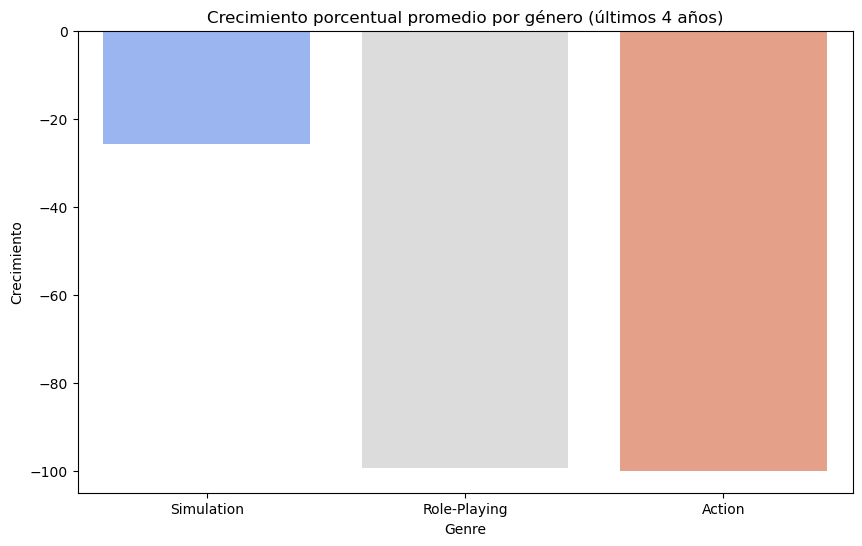

In [37]:
#GRAFICAR
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=crecimiento_prom, x='Genre', y='Crecimiento', palette='coolwarm')
plt.title('Crecimiento porcentual promedio por género (últimos 4 años)')
plt.xticks()
plt.show()
